In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Data Generation

In [2]:
def generate_data(num_rows):

    def random_dates(start, end, num):
        start_u = pd.to_datetime(start)
        end_u = pd.to_datetime(end)
        dates = pd.to_datetime(start_u + (end_u - start_u) * np.random.rand(num))
        return dates.strftime('%m/%y')

    data = pd.DataFrame({
        'Applicant ID': np.arange(1, 1 + num_rows),
        'School Name': np.random.choice(['Providence University', 'American University', 'Yale University', 'Harvard University', 'Brandeis University', 'Fordham University', 'Howard University'], num_rows),
        'GPA': np.round(np.random.uniform(1.0, 4.0, num_rows), 2),
        'Degree': np.random.choice(['Bachelors', 'Masters', 'PhD'], num_rows, p=[0.6, 0.25, 0.15]),
        'Location': np.random.choice(['Providence', 'Boston', 'Los Angeles', 'Miami', 'Chicago', 'New York City', 'Charlottesville', 'Waltham'], num_rows),
        'Gender': np.random.choice(['M', 'F', 'N/A'], num_rows, p=[0.45, 0.45, 0.1]),
        'Veteran status': np.random.choice(['1', '0', 'N/A'], num_rows, p=[0.1, 0.8, 0.1]),
        'Work authorization': np.random.choice(['1', '0'], num_rows, p=[0.8, 0.2]),
        'Disability': np.random.choice(['1', '0', 'N/A'], num_rows, p=[0.05, 0.9, 0.05]),
        'Ethnicity': np.random.choice(['0', '1', '2', '3', '4'], num_rows),
        'Role 1': np.random.choice(['Junior SWE', 'Senior SWE', 'Data Scientist', 'Lawyer', 'ML Engineer'], num_rows),
        'Start 1': random_dates('01/2017', '12/2020', num_rows),  
        'End 1': random_dates('01/2021', '12/2023', num_rows),
        'Role 2': np.random.choice(['Junior SWE', 'Senior SWE', 'Data Scientist', 'Lawyer', 'ML Engineer', 'N/A'], num_rows, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5]),
        'Start 2': random_dates('01/2015', '12/2019', num_rows),
        'End 2': random_dates('01/2019', '12/2021', num_rows),
        'Role 3': np.random.choice(['Junior SWE', 'Senior SWE', 'Data Scientist', 'Lawyer', 'ML Engineer', 'N/A'], num_rows, p=[0.05, 0.05, 0.05, 0.05, 0.05, 0.75]),
        'Start 3': random_dates('01/2013', '12/2018', num_rows),
        'End 3': random_dates('01/2017', '12/2019', num_rows)
    })

    return data

In [24]:
#save the generated data
num_rows_to_generate = 3333
np.random.seed(42)
generated_data_1 = generate_data(num_rows_to_generate)
generated_data_1.loc[generated_data_1['Role 2'] == 'N/A', ['Start 2', 'End 2']] = 'N/A'
generated_data_1.loc[generated_data_1['Role 2'] == 'N/A', ['Role 3']] = 'N/A'
generated_data_1.loc[generated_data_1['Role 3'] == 'N/A', ['Start 3', 'End 3']] = 'N/A'
csv_file_path = 'generated_resume_data_1.csv'
generated_data_1.to_csv(csv_file_path, index=False)

num_rows_to_generate = 3333
np.random.seed(43)
generated_data_2 = generate_data(num_rows_to_generate)
generated_data_2.loc[generated_data_2['Role 2'] == 'N/A', ['Start 2', 'End 2']] = 'N/A'
generated_data_2.loc[generated_data_2['Role 2'] == 'N/A', ['Role 3']] = 'N/A'
generated_data_2.loc[generated_data_2['Role 3'] == 'N/A', ['Start 3', 'End 3']] = 'N/A'
csv_file_path = 'generated_resume_data_2.csv'
generated_data_2.to_csv(csv_file_path, index=False)

num_rows_to_generate = 3334
np.random.seed(44)
generated_data_3 = generate_data(num_rows_to_generate)
generated_data_3.loc[generated_data_3['Role 2'] == 'N/A', ['Start 2', 'End 2']] = 'N/A'
generated_data_3.loc[generated_data_3['Role 2'] == 'N/A', ['Role 3']] = 'N/A'
generated_data_3.loc[generated_data_3['Role 3'] == 'N/A', ['Start 3', 'End 3']] = 'N/A'
csv_file_path = 'generated_resume_data_3.csv'
generated_data_3.to_csv(csv_file_path, index=False)

In [39]:
#read the data and the result
df_1 = pd.read_csv("generated_resume_data_1.csv").fillna('N/A')
df_2 = pd.read_csv("generated_resume_data_2.csv").fillna('N/A')
df_3 = pd.read_csv("generated_resume_data_3.csv").fillna('N/A')
y_1 = pd.read_csv("generated_resume_result_1.csv")
y_2 = pd.read_csv("generated_resume_result_2.csv")
y_3 = pd.read_csv("generated_resume_result_3.csv")

In [40]:
#concatenate to make the candidate dataset
csv_file_path = 'generated_candidate_data_1.csv'
pd.concat([df_1,y_1], axis=1).drop(['applicant_id'], axis = 1).rename(columns={"score": "Resume score"}).to_csv(csv_file_path, index=False)
csv_file_path = 'generated_candidate_data_2.csv'
pd.concat([df_2,y_2], axis=1).drop(['applicant_id'], axis = 1).rename(columns={"score": "Resume score"}).to_csv(csv_file_path, index=False)
csv_file_path = 'generated_candidate_data_3.csv'
pd.concat([df_3,y_3], axis=1).drop(['applicant_id'], axis = 1).rename(columns={"score": "Resume score"}).to_csv(csv_file_path, index=False)

In [2]:
#read candidate data and result
df_1 = pd.read_csv("generated_candidate_data_1.csv")
df_2 = pd.read_csv("generated_candidate_data_2.csv")
df_3 = pd.read_csv("generated_candidate_data_3.csv")
y_1 = pd.read_csv("generated_cancidate_result_1.csv")
y_2 = pd.read_csv("generated_cancidate_result_2.csv")
y_3 = pd.read_csv("generated_cancidate_result_3.csv")

In [3]:
#form the dataset
df_features = pd.concat([df_1,df_2,df_3], axis=0)
df_labels = pd.concat([y_1,y_2,y_3], axis=0)
df = pd.concat([df_features, df_labels], axis=1)
df = df.fillna("N/A")

In [4]:
# Function to calculate the difference in months between two dates and to extract month and year from a date
def add_date_details(data):

    def calculate_months_diff(start, end):
        try:
            start_date = pd.to_datetime(start, format='%m/%y')
            end_date = pd.to_datetime(end, format='%m/%y')
            return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month
        except:
            return 'N/A'  

    def extract_month_year(date):
        try:
            date = pd.to_datetime(date, format='%m/%y')
            return date.month, date.year
        except:
            return 'N/A', 'N/A'


    for i in range(1, 4):
        start_col = f'Start {i}'
        end_col = f'End {i}'

        data[f'Duration {i} (months)'] = [calculate_months_diff(row[start_col], row[end_col]) for index, row in data.iterrows()]

        data[f'Start {i} Month'], data[f'Start {i} Year'] = zip(*[extract_month_year(row[start_col]) for index, row in data.iterrows()])
        data[f'End {i} Month'], data[f'End {i} Year'] = zip(*[extract_month_year(row[end_col]) for index, row in data.iterrows()])

        data.drop(columns=[start_col, end_col], inplace=True)

    return data
df = add_date_details(df)

In [5]:
#feature encoding
cont_features = ['GPA','Resume score','Duration 1 (months)','Duration 2 (months)','Duration 3 (months)']
ordi_features = ['Degree']

cate_features = ['School Name', 'Gender','Location','Veteran status','Work authorization','Disability','Ethnicity','Role 1','Role 2','Role 3',
                'Start 1 Month', 'Start 1 Year', 'End 1 Month', 'End 1 Year', 'Start 2 Month', 'Start 2 Year', 'End 2 Month', 'End 2 Year',
                'Start 3 Month', 'Start 3 Year', 'End 3 Month', 'End 3 Year']

df.drop(['Applicant ID','applicant_id'],axis = 1,inplace=True)

Degree_mapping = {
    'Bachelors': 1, 
    'Masters': 2,
    'PhD': 3 
}
df['Degree'] = df['Degree'].replace(Degree_mapping)
df['Duration 2 (months)'] = df['Duration 2 (months)'].replace('N/A', -1)
df['Duration 3 (months)'] = df['Duration 3 (months)'].replace('N/A', -1)


In [6]:
# get the dataset with and without dummies
df_with_dummies = pd.get_dummies(df, columns=cate_features)
df_without_dummies = df.copy()

Correlation

In [7]:
#correlation with Resume score
correlation_matrix = df_with_dummies.corr()

feature_label_correlation = correlation_matrix['Resume score'].drop('Resume score').sort_values(key=abs, ascending=False)
feature_label_correlation[:20]

School Name_Providence University   -0.028415
Role 1_Lawyer                       -0.028147
Start 1 Month_12                    -0.025661
Start 1 Month_2                     -0.025549
Start 2 Month_1                     -0.024477
Degree                              -0.024410
End 3 Month_8                       -0.022251
Start 1 Month_7                      0.021163
End 2 Month_12                       0.021031
Role 2_ML Engineer                  -0.020585
Start 2 Year_2017                    0.020455
Start 3 Month_4                      0.020274
End 1 Month_2                        0.019295
End 1 Year_2021                      0.019245
End 1 Year_2022                     -0.019004
Role 1_Junior SWE                    0.018109
Role 3_Junior SWE                   -0.017672
Start 1 Month_3                      0.017669
Role 2_Lawyer                       -0.017517
End 1 Month_7                       -0.017448
Name: Resume score, dtype: float64

In [8]:
#correlation with prediction
correlation_matrix = df_with_dummies.corr()

feature_label_correlation = correlation_matrix['prediction'].drop('prediction').sort_values(key=abs, ascending=False)
feature_label_correlation[:20]

Gender_M               0.269228
Gender_N/A            -0.268576
End 2 Year_2019       -0.113797
Gender_F              -0.106892
Start 1 Year_2020     -0.098906
Start 3 Year_N/A       0.097371
Start 3 Month_N/A      0.097371
Role 3_N/A             0.097371
End 3 Year_N/A         0.097371
End 3 Month_N/A        0.097371
End 3 Year_2017       -0.083109
End 2 Year_N/A         0.081128
Start 2 Year_N/A       0.081128
Start 2 Month_N/A      0.081128
Role 2_N/A             0.081128
End 2 Month_N/A        0.081128
Duration 1 (months)    0.075148
End 3 Year_2018       -0.064693
Start 2 Year_2018     -0.060218
Start 2 Year_2019     -0.059454
Name: prediction, dtype: float64

Disparate Impact

In [9]:
#Disparate Impact for continuous features with regard to Resume score
for feature in cont_features:
    df_without_dummies[feature + '_binned'] = pd.cut(df_without_dummies[feature], bins=10)
    grouped = df_without_dummies.groupby(feature + '_binned', observed=False)['Resume score'].mean()
    min_mean = grouped.min()
    max_mean = grouped.max()
    ratio = min_mean / max_mean 
    print(f"{feature}: {ratio}")

GPA: 0.9751828774620666
Resume score: 0.052505382926829415
Duration 1 (months): 0.957175754322889
Duration 2 (months): 0.9124406610085302
Duration 3 (months): 0.9057477306499364


In [10]:
#Disparate Impact for categorical and ordinal features with regard to Resume score
for feature in cate_features + ordi_features:
    grouped = df_without_dummies.groupby(feature)['Resume score'].mean()
    min_mean = grouped.min()
    max_mean = grouped.max()
    ratio = min_mean / max_mean  
    print(f"{feature}: {ratio}")

School Name: 0.9399170043129865
Gender: 0.9762289935345594
Location: 0.9687729204062528
Veteran status: 0.995309657192157
Work authorization: 0.9949177658277181
Disability: 0.9790854581248098
Ethnicity: 0.9767681933251646
Role 1: 0.9475192779538646
Role 2: 0.9434065879167967
Role 3: 0.8860812866709931
Start 1 Month: 0.9077436511254915
Start 1 Year: 0.9783519364601886
End 1 Month: 0.9316741705459792
End 1 Year: 0.9702023925809631
Start 2 Month: 0.8931075915511365
Start 2 Year: 0.9441848887445949
End 2 Month: 0.8930496333787405
End 2 Year: 0.9856829297669135
Start 3 Month: 0.8370624471028819
Start 3 Year: 0.9219630842246199
End 3 Month: 0.8169626139379847
End 3 Year: 0.92955756554789
Degree: 0.9519971188172789


In [11]:
#Disparate Impact for continuous features with regard to prediction
for feature in cont_features:
    df_without_dummies[feature + '_binned'] = pd.cut(df_without_dummies[feature], bins=10)
    grouped = df_without_dummies.groupby(feature + '_binned', observed=False)['prediction'].mean()
    min_mean = grouped.min()
    max_mean = grouped.max()
    ratio = min_mean / max_mean 
    print(f"{feature}: {ratio}")

GPA: 0.8291404097826316
Resume score: 0.8950528669629793
Duration 1 (months): 0.6569421934089681
Duration 2 (months): 0.5603231171299596
Duration 3 (months): 0.3756132634072069


In [12]:
#bin continous features to check the DI for binned groups
feature = 'Duration 3 (months)'
independence = df_without_dummies.groupby(feature + '_binned')['prediction'].mean()
independence

C:\Users\crazycyt\AppData\Local\Temp\ipykernel_29684\3536065587.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  independence = df_without_dummies.groupby(feature + '_binned')['prediction'].mean()


Duration 3 (months)_binned
(-20.101, -9.9]    0.152174
(-9.9, 0.2]        0.405135
(0.2, 10.3]        0.232394
(10.3, 20.4]       0.180723
(20.4, 30.5]       0.275449
(30.5, 40.6]       0.292553
(40.6, 50.7]       0.283951
(50.7, 60.8]       0.294118
(60.8, 70.9]       0.354839
(70.9, 81.0]       0.388889
Name: prediction, dtype: float64

In [13]:
#Disparate Impact for categorical and ordinal features with regard to prediction
for feature in cate_features + ordi_features:
    grouped = df_without_dummies.groupby(feature)['prediction'].mean()
    min_mean = grouped.min()
    max_mean = grouped.max()
    ratio = min_mean / max_mean  
    print(f"{feature}: {ratio}")

School Name: 0.9324438079941172
Gender: 0.0
Location: 0.9031998546700232
Veteran status: 0.9366561604584527
Work authorization: 0.9596258944292752
Disability: 0.8828908190771506
Ethnicity: 0.9034545015320847
Role 1: 0.9584626197417744
Role 2: 0.7906455800625619
Role 3: 0.5527154773385929
Start 1 Month: 0.8520720624207688
Start 1 Year: 0.7005989895958383
End 1 Month: 0.9028611908891363
End 1 Year: 0.9597818282608223
Start 2 Month: 0.7339748953974896
Start 2 Year: 0.7028357001404208
End 2 Month: 0.6796063846273052
End 2 Year: 0.6260914317690972
Start 3 Month: 0.5315667685506571
Start 3 Year: 0.501627012001465
End 3 Month: 0.4910664433277499
End 3 Year: 0.47676353721140763
Degree: 0.9680974304579966


Visialization

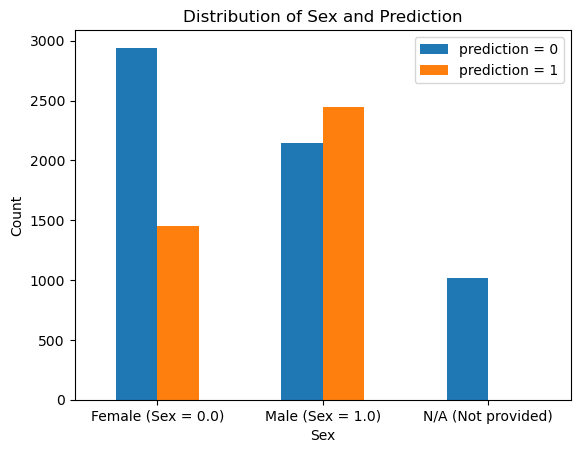

In [14]:
joint_distrib = pd.crosstab(df_without_dummies["Gender"], df_without_dummies["prediction"])
joint_distrib.plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex and Prediction')
tick_labels = ['Female (Sex = 0.0)', 'Male (Sex = 1.0)', 'N/A (Not provided)']
plt.xticks(range(len(joint_distrib)), tick_labels, rotation=0)

plt.legend(['prediction = 0', 'prediction = 1'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


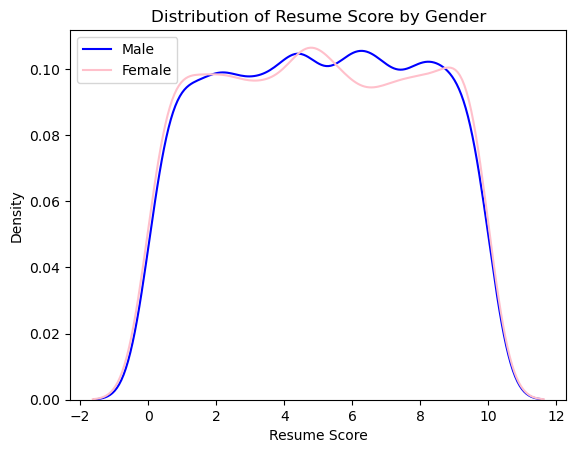

In [15]:
sns.kdeplot(df_without_dummies[df_without_dummies['Gender'] == 'M']['Resume score'], color='blue', label='Male')
sns.kdeplot(df_without_dummies[df_without_dummies['Gender'] == 'F']['Resume score'], color='pink', label='Female')

plt.xlabel('Resume Score')
plt.ylabel('Density')

plt.title('Distribution of Resume Score by Gender')


plt.legend()


plt.show()

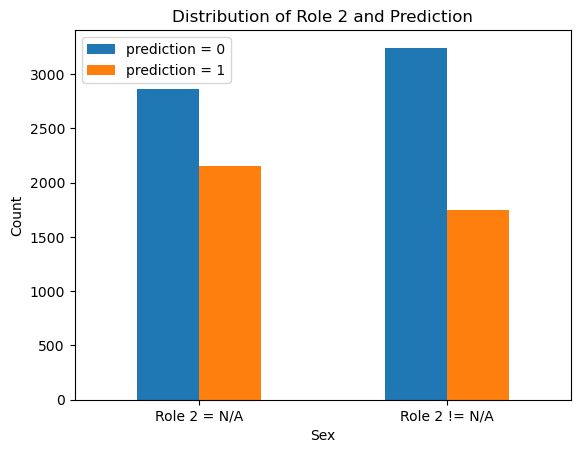

In [16]:
df_without_dummies['Role_2_Category'] = df_without_dummies['Role 2'].apply(lambda x: 'N/A' if x == 'N/A' else 'Not N/A')
joint_distrib = pd.crosstab(df_without_dummies["Role_2_Category"], df_without_dummies["prediction"])
joint_distrib.plot(kind='bar')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Role 2 and Prediction')
tick_labels = ['Role 2 = N/A', 'Role 2 != N/A']
plt.xticks(range(len(joint_distrib)), tick_labels, rotation=0)

plt.legend(['prediction = 0', 'prediction = 1'])
plt.show()

XGBoost Model

In [17]:
#use only instances that have role 2 and role 3
df = df[df['Start 3 Year'] != 'N/A']
df_with_dummies = pd.get_dummies(df, columns=cate_features)

In [18]:
#get X and y
X = df_with_dummies.drop('prediction', axis = 1)
y = df_with_dummies['prediction']

In [19]:
#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [21]:
#Train the XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=10,
    learning_rate=0.1,
    max_depth=5,
)


model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


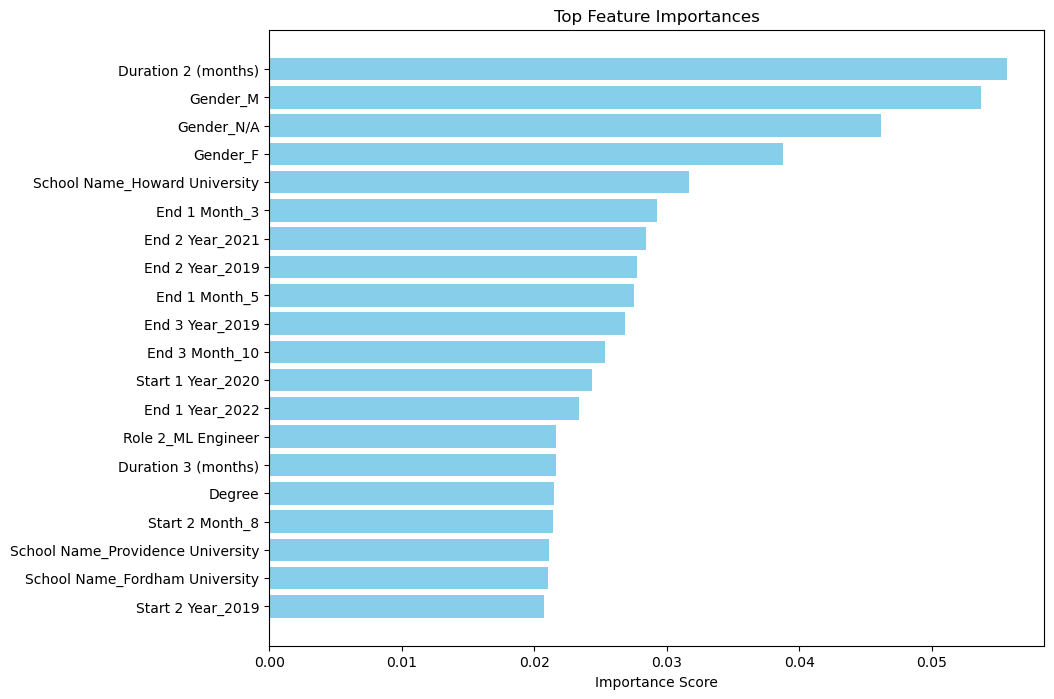

In [22]:
#Plot feature importance
importance = model.feature_importances_

features = X_train.columns
top_k = 20

sorted_indices = np.argsort(importance)[::-1]
top_k_indices = sorted_indices[:top_k] 


top_k_features = features[top_k_indices]
top_k_importance = importance[top_k_indices]


plt.figure(figsize=(10, 8))
plt.barh(range(len(top_k_features)), top_k_importance, align='center', color='skyblue')
plt.yticks(range(len(top_k_features)), top_k_features)
plt.xlabel('Importance Score')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

In [23]:
#Train a logistic model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


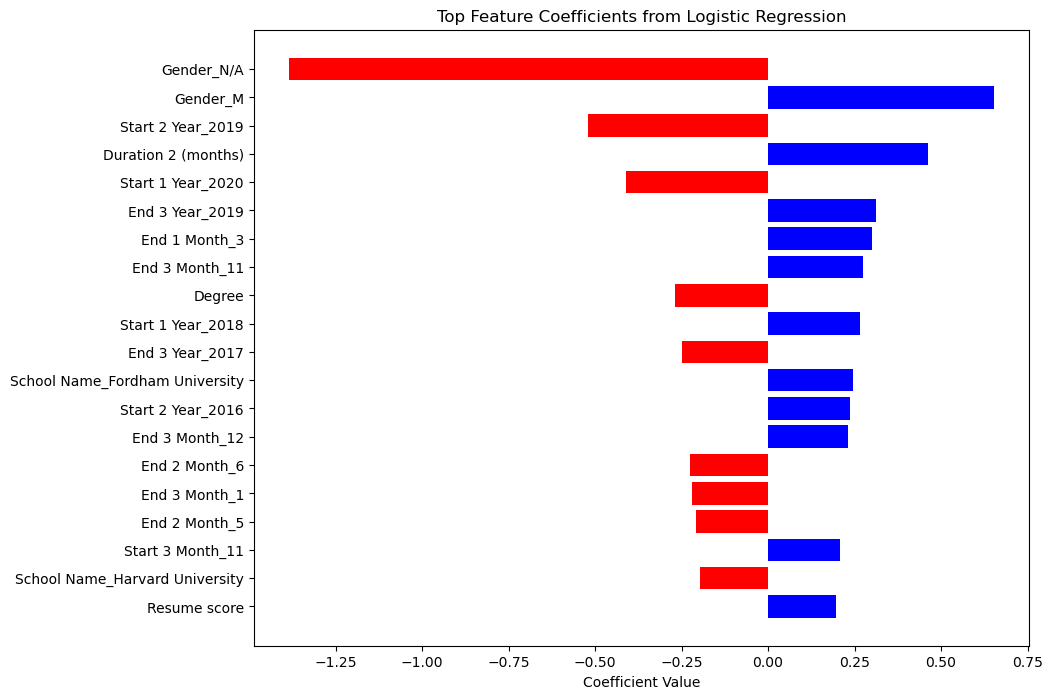

In [24]:
#Plot Top Feature Coefficients
feature_importance = model.coef_[0]  
features = X_train.columns
feature_importance_with_names = sorted(zip(feature_importance, features), key=lambda x: abs(x[0]), reverse=True)

top_k = 20
# Select the top 10 features
top_k_features = feature_importance_with_names[:top_k]

scores, names = zip(*top_k_features)


plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'blue' for x in scores]  
plt.barh(range(len(names)), scores, align='center', color=colors)
plt.yticks(range(len(names)), names)
plt.xlabel('Coefficient Value')
plt.title('Top Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis() 
plt.show()
